In [8]:
import pandas as pd
%matplotlib inline
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

#                 Arduino Voltage Report


###                                    February 27, 2018





# 1 Overview

This project was intended to be an "easier" project to help familiarize ourselves with the ins and outs of an the tools that we will be using all semester such as the arduino & its IDE, the Microcontroller, the breadboards, and the jupyter notebooks. The other main goal of this project was to build a circuit that allows us to study the behavior of an LED. The relationship we are trying to test here is called the Shockley diode equation which I have put below this. 

![Shockley diode equation](https://render.githubusercontent.com/render/math?math=I%20%3D%20I_o%20%28e%5E%7B%5Cfrac%7B%5Ceta%20q%20V_d%7D%7Bk_b%20T%7D%7D-1%29&mode=display)

We used an arduino to control the power levels to the diode as well as we used it to record the voltage drop at two different locations.

# 2 Schematic

We began by deciding what were good values for the first resistor and second resistor. To do this we used the RC time constant which is a relationship between the time constant, the resistance and the capacitance. Then we just solved for the resistance and got around 8,200 ohms. For the second resistor we used good ol ohms law to calculate what the resistance was and got 180 ohms. After that we just followed the schimatic and added wires into A2 and A3 to measure the voltages and then we started our code.
![equation](https://wikimedia.org/api/rest_v1/media/math/render/svg/da6d2346f69970c5f4a71702c3d916bd9f1cb48a)




![Schematic](https://github.com/sspickle/instrumentation-projects/raw/3c867d5a0ef077d8292be79d2819045d4da2e555/proj1/proj1.png)

   
# 3 Code

We used the arduino IDE to program the arduino. All we did was write some code to tell the arduino to send out diffrent power levels and collect voltage readings.


    int powerValue = 0; // declares the value for power for the write
    void setup() { 
      pinMode(3,OUTPUT); //activates pin 3 as output
      Serial.begin(9600); // sets the bit rate
      Serial.print("Voltage1:"); // Creates column header for voltage1 
      Serial.println("\tVoltage2:"); // Creates column header for voltage2
    }

    void loop() { 
      if(powerValue < 250){
      analogWrite(3, powerValue); // gives the power to the board
      delay(500); // will wait .5 second before excuteing loop again
      float voltage1 = analogRead(2) * (5.0 / 1023.0); // creates variable of float type and calculates voltage
      float voltage2 = analogRead(3) * (5.0 / 1023.0); // creates variable of float type and calculates voltage
      Serial.print(voltage1); // prints the value of voltage1 to the serial monitor
      Serial.print("\t  \t"); //tabs in order to make nice columns
      Serial.print(voltage2); // prints the value of voltage2 to the serial monitor
      Serial.print("\t \t \t"); //tab for aethstetics
      Serial.println(powerValue); //print power value
      powerValue += 5;  // increments the power
      }
    }


   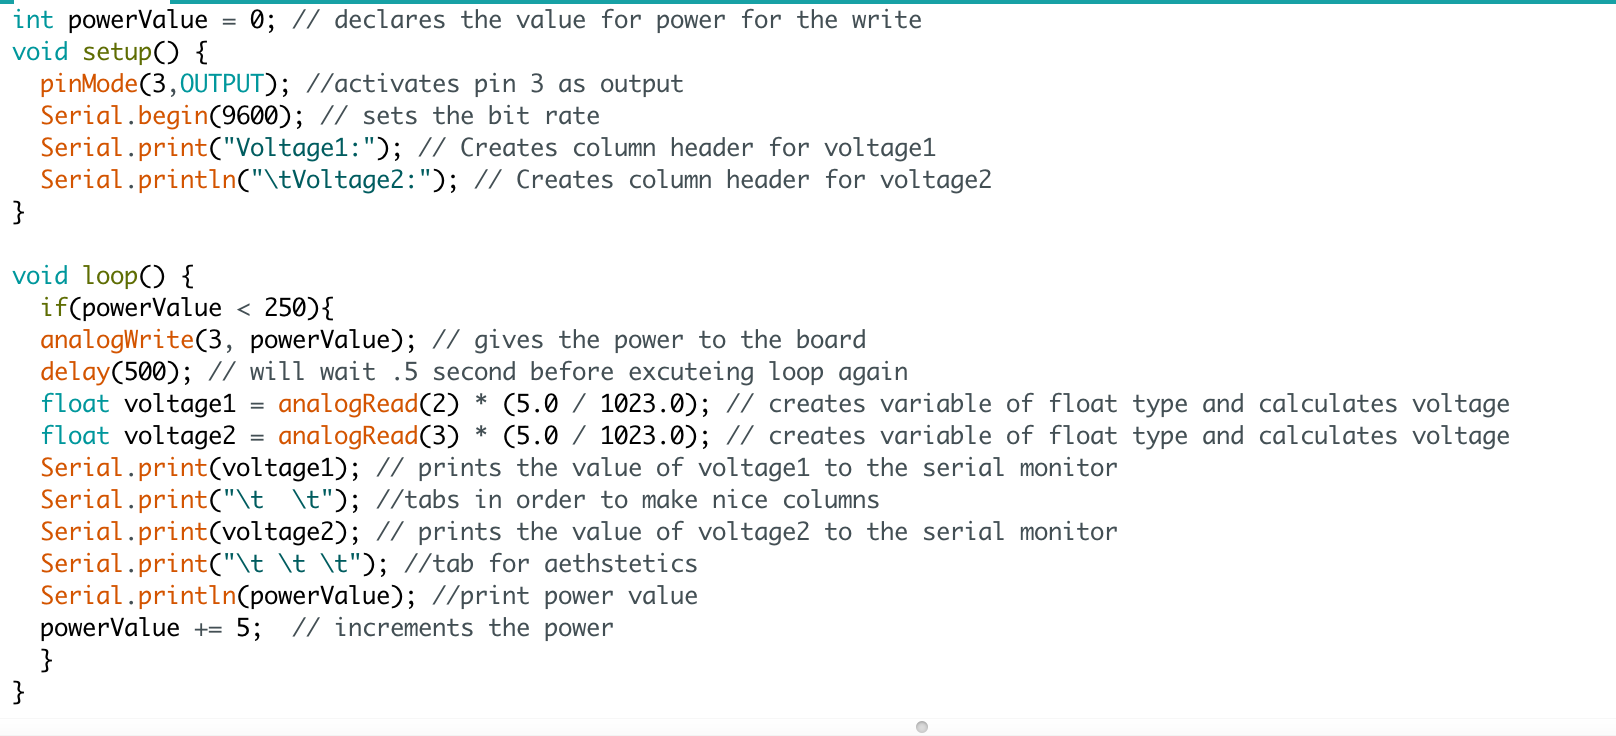
    
# 4 Data
In the lab we collected the voltage before and after a resistor as well as how much power we were supplying. The useful data for the analysis is where voltage 1 was greater than voltage 2. So I provided that data below. 



In [9]:
data = pd.read_excel('Project 1 data.xlsx') # reading the excel file

In [10]:
dataf = data[data.Voltage_1 > data.Voltage_2] # printing the excel file to the screen
dataf

,Voltage_1,Voltage_2,Power_Value
16,1.55,1.54,80
17,1.65,1.61,85
18,1.74,1.65,90
19,1.85,1.69,95
20,1.94,1.71,100
21,2.04,1.73,105
22,2.15,1.74,110
23,2.23,1.76,115
24,2.34,1.77,120
25,2.44,1.79,125


# 5 Analysis
## Exercise 1:
To come up with the random number distribution I used the random.normal function with mu being 25 std being 6 and the length being 10,000. Then I plotted the data and the expected straight line. To calculate the probability I took how many numbers were greater than 35 and then divided that number by 10,000 or N. The result was .0472. This number makes sense as shown by the fact that you cant hardly tell the difference between the expected and the actual.

Slope = 5.935 +/- 0.001
Intercept = 24.999 +/- 0.001
Probability x > 35 =  0.0451


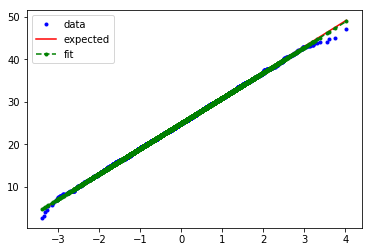

In [11]:
mu = 25
std = 6
N=10000

xs = np.random.normal(loc=mu, scale=std, size=N)

xs = np.array(sorted(xs)) # sort the sample values
zs = np.array(sorted(np.random.normal(loc=0, scale=1.0, size=N))) # generate an equal sized sorted standard normal

def fit_linear(x, m, b):
    return m*x+b

par, cov = curve_fit(fit_linear, zs, xs)
m, b = par
dm, db = np.sqrt(np.diag(cov))

print("Slope = {0:.3f} +/- {1:.3f}".format(m, dm))
print("Intercept = {0:.3f} +/- {1:.3f}".format(b,db))

plt.plot(zs,xs,'b.', label='data')           # plot the data
plt.plot(zs, zs*std + mu,'r-', label='expected') # plot the expected straight line
plt.plot(zs, fit_linear(zs, m, b), 'g--.', label='fit')
plt.legend()
print("Probability x > 35 = ", len(xs[xs > 35])/N)

# 5 Analysis 
## Exercise 2 part 1:
For this exercise I used the data we collected from the lab to plot both a linear and a curved model. For the linear model I used the voltage 2 values for y and the log natural of the current for x. I plugged those values along with the linear_model function into curve_fit and out came a a somewhat linear line. The data was descent but not the best, as you can see when you compare it to the best fit line quite a lot of it isn't on the line. 

Text(0,0.5,'Voltage 2(V)')

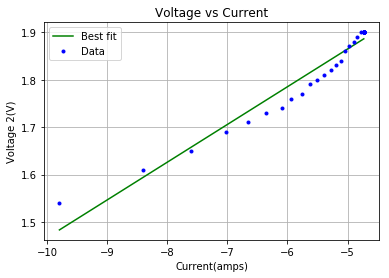

In [21]:
v1=dataf.Voltage_1.values
v2=dataf.Voltage_2.values
r=180
I=(v1-v2)/r


def linear_model(x, A, B):
    return A*x + B



y = v2
x = np.log(I)








sig = .005 * np.ones(len(x)) # defining sig for sigma in the maner that makes anaconda happy

par, cov = curve_fit(linear_model, x, y, p0=(.05,1), sigma = sig)
# curve_fit returns an array of the slope and intercept and returns a n x n matrix 
# n being how many parameters you have. This matrix is useful to us because
# the square root of the diagonal postions are the uncertiamties of the parameters



m = par[0] # getting the slope example
b = par[1] # getting the intercept example

dm = np.sqrt(cov[0,0]) # uncertainty in the slope example
db = np.sqrt(cov[1,1]) # uncertainty in the intercept example

plt.grid() # prints out the grid on the graph 
yfit = linear_model(x,m,b) # calculating best fit line example
plt.plot(x, yfit, 'g-', label = 'Best fit') # graphing the best fit line example
plt.plot(x, y, 'b.', label = 'Data') # graphing voltage vs current
plt.legend()

plt.title("Voltage vs Current") #example
plt.xlabel("Current(amps)") # labeling the x axis example 
plt.ylabel("Voltage 2(V)") # labeling the y axis example




# 5 Analysis 
## Exercise 2 part 2:
For the second part the only things I changed were the x values and the model function. For x I set it equal to just the current and for the internal_R_model I included a few more variables. When I graphed the data that curve_fit gave me back my results were slightly better than the linear model. When you compare the best fit line to the data it is much closer than the linear model.

Text(0,0.5,'Voltage 2(V)')

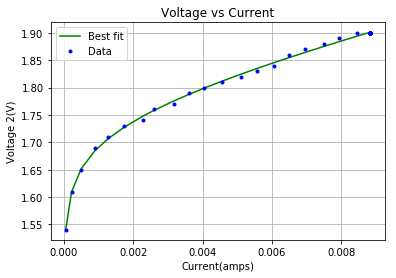

In [20]:
# For the second part the values will stay the same except for these two 
#x = I
#c = 40

def internal_R_model(x, A, B, C):
    return A * np.log(x) + B + C * x

y = v2
x = I





sig = .005 * np.ones(len(x)) # defining sig for sigma in the maner that makes anaconda happy

par, cov = curve_fit(internal_R_model, x, y, p0=(.05,0,5), sigma = sig)
# curve_fit returns an array of the slope and intercept and returns a n x n matrix 
# n being how many parameters you have. This matrix is useful to us because
# the square root of the diagonal postions are the uncertiamties of the parameters



A = par[0] # getting the slope example
B = par[1] # getting the intercept example
C = par[2]

dm = np.sqrt(cov[0,0]) # uncertainty in the slope example
db = np.sqrt(cov[1,1]) # uncertainty in the intercept example


yfit = internal_R_model(x,A,B,C) # calculating best fit line example
plt.plot(x, yfit, 'g-', label = 'Best fit') # graphing the best fit line example
plt.plot(x, y, 'b.', label = "Data") # graphing voltage vs current
plt.legend()
plt.grid() # prints out the grid on the graph 
plt.title("Voltage vs Current") #example
plt.xlabel("Current(amps)") # labeling the x axis example 
plt.ylabel("Voltage 2(V)") # labeling the y axis example




# 6 Conclusion 
I would consider the data from our lab to be good data overall as it followed the trends that we expected. Those being that the linear model was OK but not great and that when I factored in the internal resistance the data was much more accurate. I would say this project also help meet the goals of learning how to use python better and refreshing the mind on how to wire up Schematics.